<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tqdm
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV

In [15]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

X_train, X_test_cv, y_train, y_test_cv = train_test_split(X, y, test_size=0.4, random_state=15)

X_cv, X_test, y_test, y_cv = train_test_split(X_test_cv, y_test_cv, test_size=0.5, random_state=15)

clf = SVC(gamma = 0.001, C= 100)
clf.fit(X_train,y_train)

calibrated_clf = CalibratedClassifierCV(base_estimator=clf)

calibrated_clf.fit(X_cv, y_cv)

calibrated_clf.predict_proba(X_test)







# dual_coef = clf.dual_coef_[0]
# # print (len(dual_coef))

# intercept = clf.intercept_[0]
# # print (intercept)

# sup_vec = clf.support_vectors_
# # print (len(sup_vec))



# def decision_function(X_cv, sup_vec, dual_coef, intercept,gamma = 0.001):
#     f_cv = []
#     for 𝑥_𝑞 in X_cv:
#         sum_q = 0
#         for i in range(0,len(sup_vec)):
# #             print (sup_vec[i])
#             norm2 = np.linalg.norm(sup_vec[i] - x_q)
#             k = np.exp(-gamma*(norm2**2))
#             sum_q += dual_coef[i]*k
#         f_q = sum_q + intercept
#         f_cv.append(f_q)
#     return f_cv

array([[0.68119949, 0.31880051],
       [0.68734825, 0.31265175],
       [0.68880761, 0.31119239],
       ...,
       [0.69643871, 0.30356129],
       [0.6895459 , 0.3104541 ],
       [0.68794717, 0.31205283]])

In [3]:
f_cv = decision_function(X_cv,sup_vec,dual_coef,intercept)
# print (len(f_cv))

val =  clf.decision_function(X_cv)
# print (len(val))

check = f_cv[15:25] -  val[15:25]
print (check)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

## TASK F

> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

In [4]:
n_plus = np.shape(np.where(y_cv == 1))[1]
n_minus = np.shape(np.where(y_cv == 0))[1]

y_cv_plus = (n_plus+1)/(n_plus+2)
y_cv_minus = 1/(n_minus + 2)

y_cv = np.where(y_cv == 1,y_cv_plus,y_cv_minus)
f_cv = np.array(f_cv).reshape(-1,1)

In [11]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    w = np.zeros_like(dim)
    b = 0
    return w,b

def sigmoid(z):
    sigmoid = 1/(1+np.exp(-z))
    return sigmoid

def loss_function(y_true,y_pred):
    '''In this function, we will compute log loss '''
    n = len(y_true)
    loss_temp = 0
    for i in range(0,n):
        temp = y_true[i]*np.log10(y_pred[i]) + ((1-y_true[i])*np.log10(1-y_pred[i]))
        loss_temp+=temp
    loss = -1 * ((loss_temp)/n)
    return loss

def gradient_dw(f_cv,y_cv,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = np.zeros(len(w)) 
    z = sigmoid(np.matmul(np.transpose(w),f_cv) + b)
    dw = f_cv*(y_cv-z) -(alpha/N)*w
    return dw

def gradient_db(f_cv,y_cv,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    z = sigmoid(np.matmul(np.transpose(w),f_cv) + b)
    db = y_cv - z
    return db

def train(f_cv,y_cv,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    w,b = initialize_weights(f_cv[0])
    cv_loss = np.zeros(epochs)
    f_cv_pred = np.zeros(len(f_cv)) 

 
    for epoch in tqdm(range(0,epochs)):
        for i in range(len(f_cv)):
            dw = gradient_dw(f_cv[i],y_cv[i],w,b,alpha,N)
            db = gradient_db(f_cv[i],y_cv[i],w,b)
            w  = w + eta0*dw
            b  = b + eta0*db
            
        for i in range(0,len(f_cv)):
            f_cv_pred[i] = sigmoid(np.dot(w,f_cv[i])+b)
            
        cv_loss[epoch] = loss_function(y_cv,f_cv_pred)
        
    return w,b,cv_loss

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 32.22it/s]

[0.12575653]
-0.18851785037755978


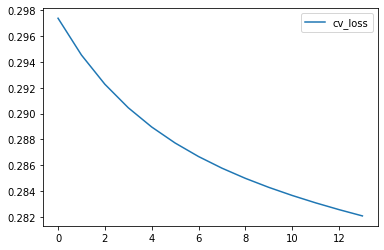

In [12]:
alpha=0.0001
eta0=0.0001
N=len(f_cv)
epochs= 14
w,b,cv_loss = train(f_cv,y_cv,epochs,alpha,eta0)

print (w)
print (b)

epochs = np.arange(0, 14, 1)
plt.plot(epochs,cv_loss)
plt.legend(["cv_loss"], loc ="upper right")